<a href="https://colab.research.google.com/github/amanchandra395/amanchandra395/blob/main/Fake_News_Detection_Using_Artificial_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score,precision_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving News3.csv to News3.csv


In [33]:
data = pd.read_csv('News3.csv',index_col=0)
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [34]:
data.shape

(1028, 5)

In [35]:
data = data.drop(["title", "subject","date"], axis = 1)

In [36]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [37]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

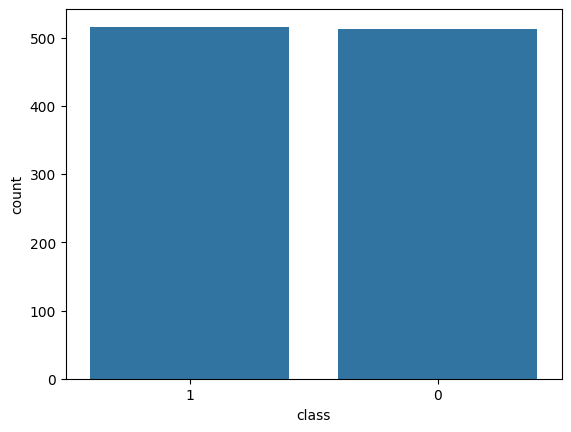

In [38]:
sns.countplot(data=data, x='class', order=data['class'].value_counts().index)

In [39]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

In [41]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 1028/1028 [00:51<00:00, 19.91it/s]


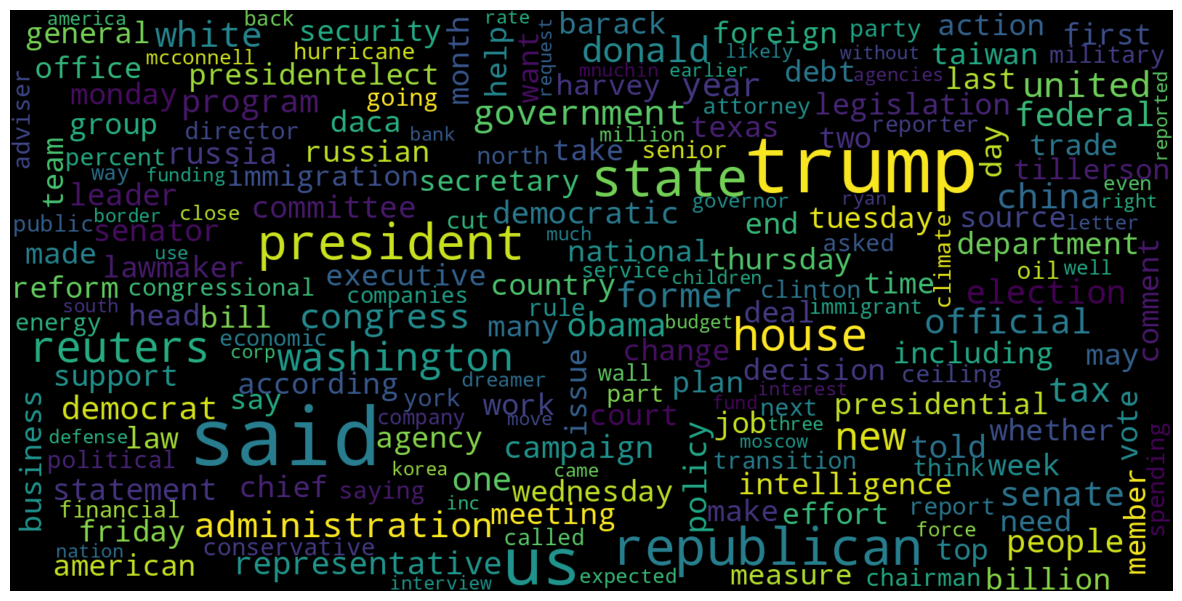

In [42]:
# Real
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

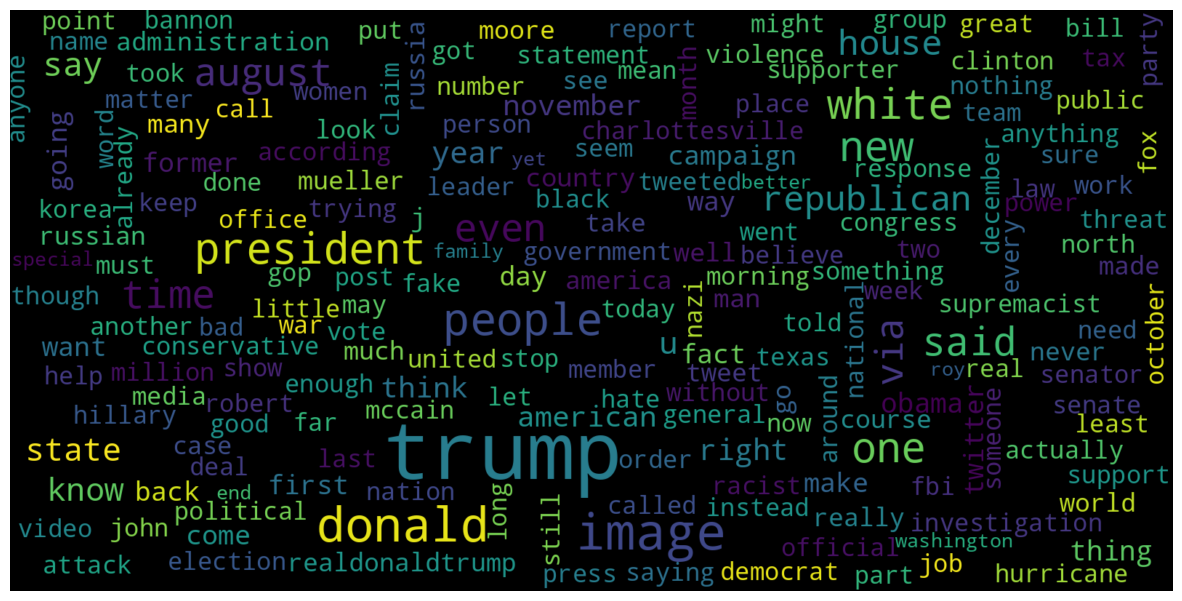

In [43]:
# Fake
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

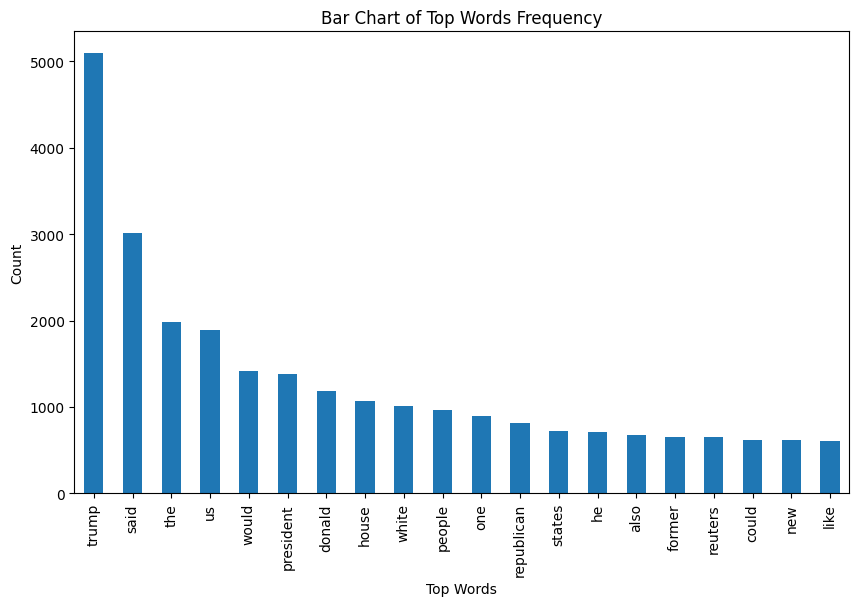

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
accuracy1=accuracy_score(y_test, model.predict(x_test))
precision1=precision_score(y_test, model.predict(x_test))
f1score1=f1_score(y_test, model.predict(x_test))
print("Accuracy of LogisticRegression is: ",accuracy1)
print("Precision of LogisticRegression is: ",precision1)
print("F1_score of LogisticRegression is: ",f1score1)

Accuracy of LogisticRegression is:  0.9766536964980544
Precision of LogisticRegression is:  0.9785714285714285
F1_score of LogisticRegression is:  0.9785714285714285


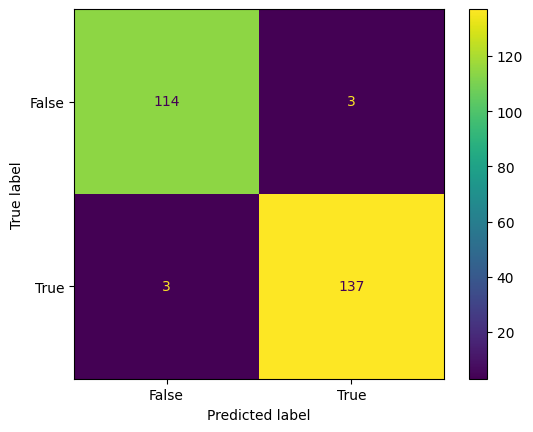

In [48]:
# Confusion matrix of Results from LogisticRegression
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing
accuracy2=accuracy_score(y_test, model.predict(x_test))
precision2=precision_score(y_test, model.predict(x_test))
f1score2=f1_score(y_test, model.predict(x_test))
print("Accuracy of DecisionTreeClassifier is: ",accuracy2)
print("Precision of DecisionTreeClassifier is: ",precision2)
print("F1_score of DecisionTreeClassifier is: ",f1score2)

Accuracy of DecisionTreeClassifier is:  1.0
Precision of DecisionTreeClassifier is:  1.0
F1_score of DecisionTreeClassifier is:  1.0


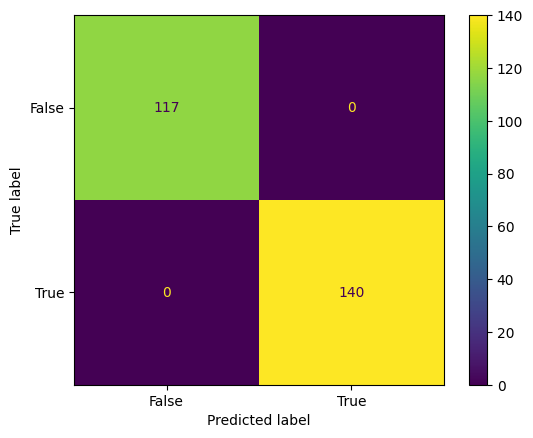

In [50]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

# testing the model
accuracy4=accuracy_score(y_test, model.predict(x_test))
precision4=precision_score(y_test, model.predict(x_test))
f1score4=f1_score(y_test, model.predict(x_test))
print("Accuracy of KNN is: ",accuracy4)
print("Precision of KNN is: ",precision4)
print("F1_score of KNN is: ",f1score4)

Accuracy of KNN is:  0.8910505836575876
Precision of KNN is:  0.8544303797468354
F1_score of KNN is:  0.9060402684563759


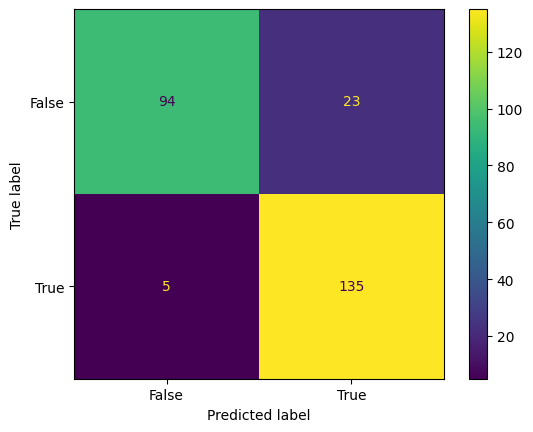

In [52]:
# Confusion matrix of Results from KNN is
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [53]:
#Import Special Vector Machine model
from sklearn import svm
model = svm.SVC(kernel='linear') # Linear Kernel
model.fit(x_train, y_train)

#testing the model
accuracy5=accuracy_score(y_test, model.predict(x_test))
precision5=precision_score(y_test, model.predict(x_test))
f1score5=f1_score(y_test, model.predict(x_test))
print("Accuracy of SVM is: ",accuracy5)
print("Precision of SVM is: ",precision5)
print("F1_score of SVM is: ",f1score5)

Accuracy of SVM is:  0.9883268482490273
Precision of SVM is:  0.9858156028368794
F1_score of SVM is:  0.9893238434163701


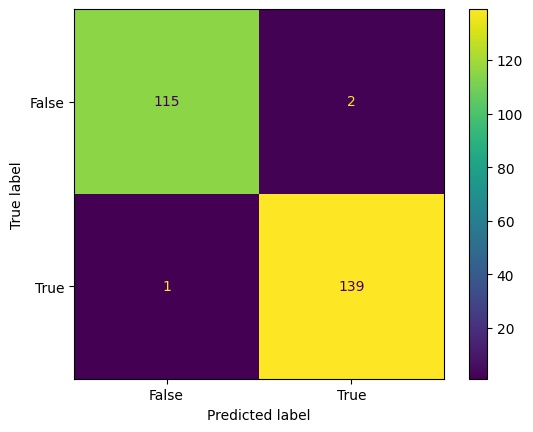

In [54]:
# Confusion matrix of Results from SVM is
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [56]:
data = pd.read_csv("News3.csv")

x = np.array(data["text"])
y = np.array(data["class"])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [57]:
sample = input("Enter the News: ")
data = cv.transform([sample]).toarray()
a = model.predict(data)
if(a==0):
  print('Fake')
else:
  print('Real')

Enter the News: Aman is USA President
Fake


In [58]:
# testing
accuracy3 = accuracy_score(ytest,model.predict(xtest))
f1score3 = f1_score(ytest, model.predict(xtest))
precision3=precision_score(ytest,model.predict(xtest))
print("Accuracy of MultinomialNB is: ",accuracy3)
print("Precision of MultinomialNB is: ",precision3)
print("F1score of MultinomialNB is: ",f1score3)

Accuracy of MultinomialNB is:  0.980544747081712
Precision of MultinomialNB is:  0.991869918699187
F1score of MultinomialNB is:  0.9799196787148594


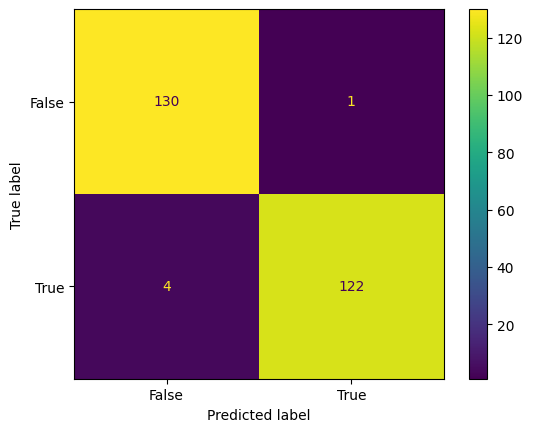

In [59]:
# Confusion matrix of Results from MultinomialNB
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, model.predict(xtest))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

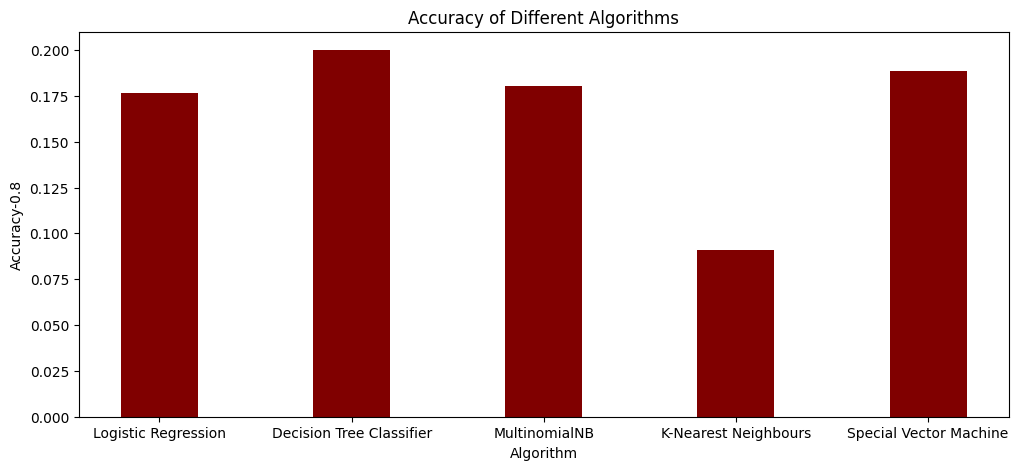

In [72]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Logistic Regression':accuracy1-0.8, 'Decision Tree Classifier':accuracy2-0.8, 'MultinomialNB':accuracy3-0.8, 'K-Nearest Neighbours':accuracy4-0.8, 'Special Vector Machine':accuracy5-0.8}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy-0.8")
plt.title("Accuracy of Different Algorithms")
plt.show()

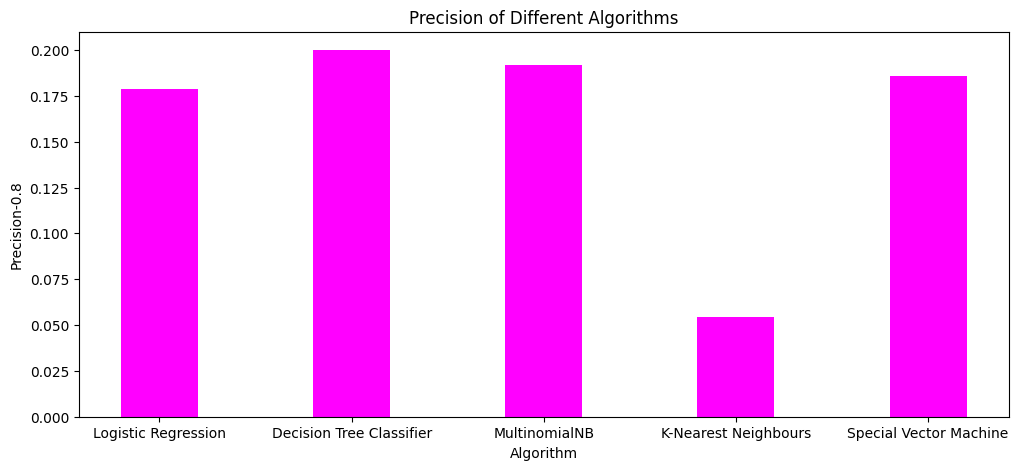

In [71]:
# creating the dataset
data = {'Logistic Regression':precision1-0.8, 'Decision Tree Classifier':precision2-0.8, 'MultinomialNB':precision3-0.8, 'K-Nearest Neighbours': precision4-0.8,'Special Vector Machine':precision5-0.8}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(courses, values, color ='magenta', width = 0.4)

plt.xlabel("Algorithm")
plt.ylabel("Precision-0.8")
plt.title("Precision of Different Algorithms")
plt.show()

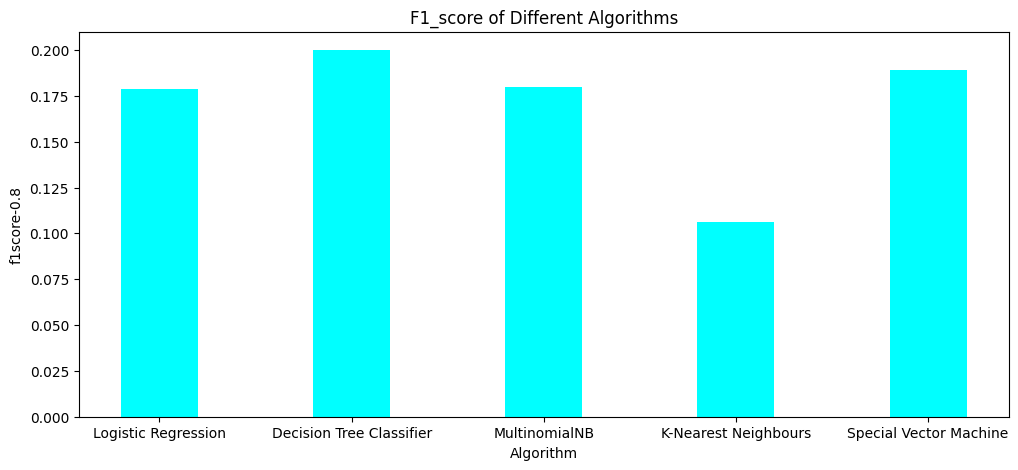

In [70]:
data = {'Logistic Regression':f1score1-0.8, 'Decision Tree Classifier':f1score2-0.8, 'MultinomialNB':f1score3-0.8, 'K-Nearest Neighbours': f1score4-0.8, 'Special Vector Machine':f1score5-0.8}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(courses, values, color ='cyan', width = 0.4)

plt.xlabel("Algorithm")
plt.ylabel("f1score-0.8")
plt.title("F1_score of Different Algorithms")
plt.show()